# Converting  h5 Model into JSON and NPY Files
## Importing Libraries and Model

In [1]:
import pickle, os, json, cv2, numpy as np, matplotlib.pyplot as plt, tensorflow as tf, keras
from skimage import io
from tqdm import tqdm


#Static Variables
class_names = ["curved", "negative", "straight"]
IMG_SIZE = 299

#Load Model
model = keras.models.load_model('stairs_model.h5')
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

print("Model Loaded")

Using TensorFlow backend.


Model Loaded


## Saving Model

In [2]:
path = "model_weights"

#Saving the Model architecture
json_string = model.to_json()
with open('arc.json','w') as outfile:
    json.dump(json_string,outfile)
    
#save Model as text
weights = model.get_weights()
for index,arr in tqdm(enumerate(weights)):
    temp = str(index)
    while True:
        if len(temp)==3:
            break
        temp = "0" + temp
    np.save(path + "/w_"+temp+".npy", arr)

900it [00:00, 2292.83it/s]


In [3]:
weights[0].shape

(3, 3, 3, 32)

In [4]:
del model

## Loading Model

In [5]:
path = "model_weights"

#Loading Model architecture via JSON
with open('arc.json') as f:
    data_str = json.load(f)
model = keras.models.model_from_json(data_str)

# Loading model weights from text
weights = []
for filename in tqdm(sorted(os.listdir(path))):      
    weights.append(np.load(path+"/" +filename))


100%|██████████| 900/900 [00:00<00:00, 3332.93it/s]


In [6]:
model.set_weights(weights)

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Testing Loaded Model

In [7]:
def predict(img_array):  #nxnxc input (channels last) datatype = int
    #call("convert -resize " + str(IMG_SIZE) + "x" + str(IMG_SIZE) + " "+img_path + " " + img_path +"_modified.jpg", shell=True)
    #img_array = cv2.imread(img_path+"_modified.jpg")  # Convert to array
    
    try: #Some image will already come as greyscale
        img_array = np.array([np.average(i,1) for i in img_array]) #Convert to greyscale
    except:
        pass
    
    img = img_array/255.0

    img_display  = img.astype("float32")
    img = np.resize(img,(IMG_SIZE, IMG_SIZE, 1))
    #print("img shape:", img.shape)
    plt.imshow(img_display, cmap ='gray')
    plt.show()
    prediction = model.predict(np.asarray([img]))[0]
    print("Classes:      Curved    Negative     Straight")
    print("Prediction:", prediction, "Class:", class_names[np.argmax(prediction)])
    return class_names[np.argmax(prediction)]

def url_to_img(url):
    print ("downloading "+url)
    image = io.imread(url)
 
    return image

def predict_local(img_path="prediction/2.jpg"):
    img_array = cv2.imread(img_path)  # Convert to array
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    
    class_name = predict(img_array)
    return class_name

def predict_web(url):
    img_array = url_to_img(url)
    #print("Web Image Shape:", img_array.shape)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    
    class_name = predict(img_array)
    return class_name

downloading https://i.imgur.com/Yzgh3MB.jpg


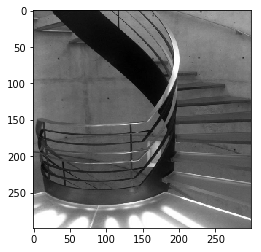

Classes:      Curved    Negative     Straight
Prediction: [9.9999988e-01 1.6584814e-09 9.0613767e-08] Class: curved


'curved'

In [8]:
url = "https://i.imgur.com/Yzgh3MB.jpg"
predict_web(url)